In [28]:
import pandas as pd
df=pd.read_csv('sales_store.csv')

<ipython-input-28-32277217e115>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('sample_data/sales_store.csv')


In [29]:
df.head()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263,555,1,1,0,1,...,7,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,2,5,2015-07-31,6064,625,1,1,0,1,...,7,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,2015-07-31,8314,821,1,1,0,1,...,7,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,2015-07-31,13995,1498,1,1,0,1,...,7,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,4,5,5,2015-07-31,4822,559,1,1,0,1,...,7,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 844338 non-null  int64  
 1   Store                      844338 non-null  int64  
 2   DayOfWeek                  844338 non-null  int64  
 3   Date                       844338 non-null  object 
 4   Sales                      844338 non-null  int64  
 5   Customers                  844338 non-null  int64  
 6   Open                       844338 non-null  int64  
 7   Promo                      844338 non-null  int64  
 8   StateHoliday               844338 non-null  object 
 9   SchoolHoliday              844338 non-null  int64  
 10  year                       844338 non-null  int64  
 11  Quarter                    844338 non-null  int64  
 12  month                      844338 non-null  int64  
 13  StoreType                  84

In [32]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [33]:
df['StoreType'] = df['StoreType'].astype(str)
df['Assortment'] = df['Assortment'].astype(str)
df['StateHoliday'] = df['StateHoliday'].astype(str)
df['PromoInterval'] = df['PromoInterval'].astype(str)
# Convert 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Open                       844338 non-null  int64         
 6   Promo                      844338 non-null  int64         
 7   StateHoliday               844338 non-null  object        
 8   SchoolHoliday              844338 non-null  int64         
 9   year                       844338 non-null  int64         
 10  Quarter                    844338 non-null  int64         
 11  month                      844338 non-null  int64   

In [96]:
# Convert relevant columns to appropriate data types
df['Store'] = df['Store'].astype(int)
df['DayOfWeek'] = df['DayOfWeek'].astype(int)
df['Open'] = df['Open'].astype(bool)
df['Promo'] = df['Promo'].astype(bool)
df['SchoolHoliday'] = df['SchoolHoliday'].astype(bool)
df['year'] = df['year'].astype(int)
df['Quarter'] = df['Quarter'].astype(int)
df['month'] = df['month'].astype(int)
df['CompetitionDistance'] = df['CompetitionDistance'].astype(float)
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].astype(float)
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].astype(float)
df['Promo2'] = df['Promo2'].astype(bool)
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].astype(float)
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype(float)


In [97]:
#!pip install forecast


In [98]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Prepare the data for XGBoost model
X = df[['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'year', 'Quarter', 'month',
        'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
        'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']].astype('float')  # Convert columns to float
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmspe = (np.sqrt(np.mean(np.square((y_test - y_pred) / y_test)))) * 100
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Percentage Error:', rmspe)


Mean Squared Error: 1600367.5407562552
Mean Absolute Error: 901.3464821437044
Root Mean Squared Percentage Error: 22.18620505129202


In [107]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare the data for XGBoost model
X = df[['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'year', 'Quarter', 'month',
        'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
        'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']].astype('float')  # Convert columns to float
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions for the next 5 months
next_5_months = pd.DataFrame()  # Create an empty dataframe
for i in range(1, 6):
    next_month_data = X.iloc[-1, :].copy()  # Copy the last row of X as the base for next month's data
    next_month_data['month'] += i  # Increment the month by i to get next month's value
    next_5_months = next_5_months.append(next_month_data, ignore_index=True)  # Append to the dataframe

y_pred = model.predict(next_5_months)  # Predict sales for the next 5 months

# Print or log the predicted sales for the next 5 months
for i, pred in enumerate(y_pred):
    print(f'Predicted Sales for Month {i+1}: {pred}')


Predicted Sales for Month 1: 8023.4716796875
Predicted Sales for Month 2: 8149.4111328125
Predicted Sales for Month 3: 8149.4111328125
Predicted Sales for Month 4: 8454.7548828125
Predicted Sales for Month 5: 8414.0458984375


<ipython-input-107-59142a50aa34>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  next_5_months = next_5_months.append(next_month_data, ignore_index=True)  # Append to the dataframe


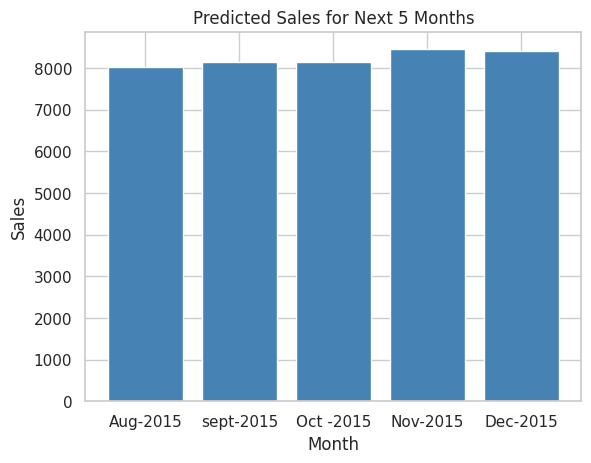

In [111]:
import matplotlib.pyplot as plt

# Create x-axis values for the next 5 months
months = ['Aug-2015', 'sept-2015', 'Oct -2015', 'Nov-2015', 'Dec-2015']

# Create a bar plot for the predicted sales
plt.bar(months, y_pred, color='steelblue')

# Set plot title and labels
plt.title('Predicted Sales for Next 5 Months')
plt.xlabel('Month')
plt.ylabel('Sales')

# Show the plot
plt.show()
